In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/Proyek teknologi cerdas/cleaned ptc.csv'
df = pd.read_csv(file_path)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [5]:
# drop fitur
df.drop(['day','month','year'], axis=1, inplace=True)

In [6]:
#mencoding
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

In [7]:
X = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region']]
y = df['Classes']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=36)
X_train.shape, X_test.shape

((194, 11), (49, 11))

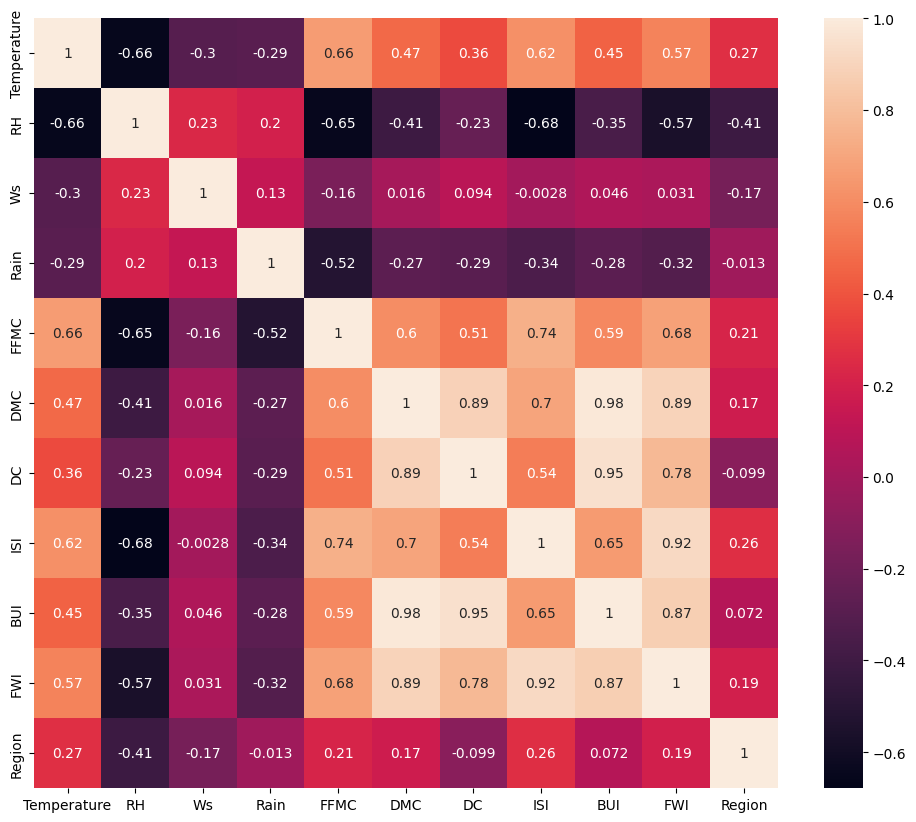

In [9]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [10]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation(X_train, 0.75)

In [12]:
corr_features

{'BUI', 'DC', 'FWI'}

In [13]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((194, 8), (49, 8))

In [14]:
def standard_scaler(X_train, X_test):
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  return X_train_scaled, X_test_scaled

In [15]:
X_train_scaled, X_test_scaled = standard_scaler(X_train, X_test)

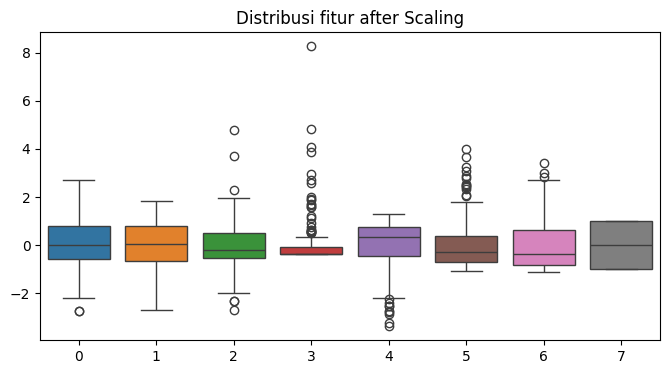

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=X_train_scaled)
plt.title('Distribusi fitur after Scaling')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Logistic Regression

In [18]:
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train_scaled,y_train)
loreg_pred = loreg.predict(X_test_scaled)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.9184
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.97      0.91      0.94        32

    accuracy                           0.92        49
   macro avg       0.90      0.92      0.91        49
weighted avg       0.92      0.92      0.92        49



## Support Vector Machine

In [19]:
svm_model = SVC(kernel='linear', C=4)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
score = accuracy_score(y_test, svm_pred)
cr = classification_report(y_test, svm_pred)

print("Support Vector Machine (SVM)")
print("Accuracy Score value: {:.4f}".format(score))
print(cr)

Support Vector Machine (SVM)
Accuracy Score value: 0.9388
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.91      0.95        32

    accuracy                           0.94        49
   macro avg       0.93      0.95      0.93        49
weighted avg       0.95      0.94      0.94        49



## KNeighbors

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy KNN:", accuracy_knn)
print(classification_report(y_test, y_pred_knn))

Accuracy KNN: 0.9183673469387755
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.94      0.94      0.94        32

    accuracy                           0.92        49
   macro avg       0.91      0.91      0.91        49
weighted avg       0.92      0.92      0.92        49



## XGBoost

In [21]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
xgb_pred = xgb.predict(X_test_scaled)
score = accuracy_score(y_test, xgb_pred)
cr = classification_report(y_test, xgb_pred)

print("XGboost")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XGboost
Accuracy Score value: 0.9592
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.94      0.97        32

    accuracy                           0.96        49
   macro avg       0.95      0.97      0.96        49
weighted avg       0.96      0.96      0.96        49



## Decision tree

In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_pred = dtc.predict(X_test_scaled)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 0.9592
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.94      0.97        32

    accuracy                           0.96        49
   macro avg       0.95      0.97      0.96        49
weighted avg       0.96      0.96      0.96        49



## Decision tree Tuning

In [23]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50 ,60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid,scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

best_model.fit(X_train_scaled, y_train)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(random_state=42)

In [24]:
dtc_tuning = grid_search.best_estimator_
dtc_tuning.score(X_test_scaled,y_test)
dtc_tuning_pred = dtc_tuning.predict(X_test_scaled)
cr = classification_report(y_test,dtc_tuning_pred)
print("dtc tuning")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

dtc tuning
Accuracy Score value: 0.9592
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.94      0.97        32

    accuracy                           0.96        49
   macro avg       0.95      0.97      0.96        49
weighted avg       0.96      0.96      0.96        49



In [25]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 36)

In [26]:
cv_dt =cross_val_score(dtc_tuning,X,y,cv= skfold,scoring="accuracy").mean()
print('CV Score Decision Tree {:.4f}'.format(cv_dt))

CV Score Decision Tree 0.9710


       Feature  Importance
4         FFMC    0.933460
6          ISI    0.038860
0  Temperature    0.011072
2           Ws    0.010380
3         Rain    0.006228
1           RH    0.000000
5          DMC    0.000000
7       Region    0.000000


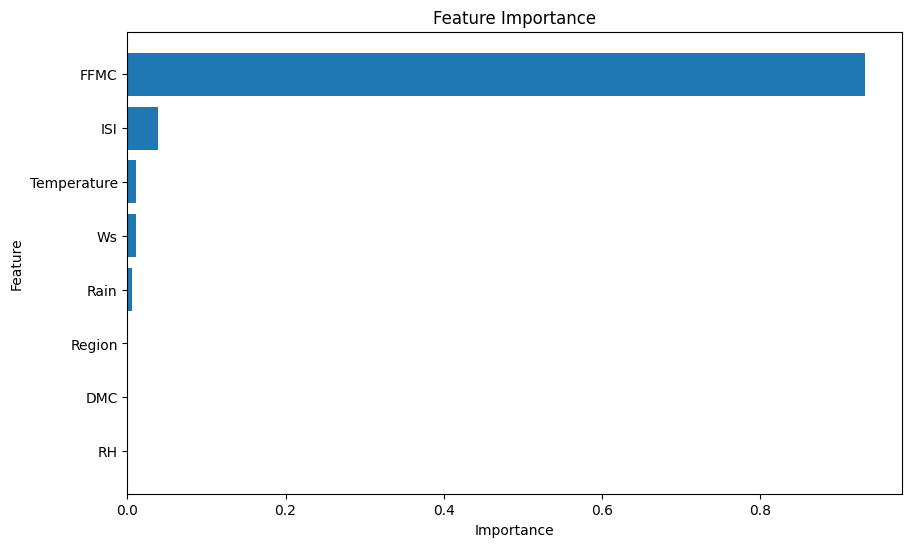

In [27]:
fitur_penting = best_model.feature_importances_
nama_fitur = X_train.columns

feature_importance = pd.DataFrame({'Feature': nama_fitur, 'Importance': fitur_penting})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [28]:
Xtrain_new = X_train.drop(['DMC', 'Region', 'RH'], axis=1)
Xtest_new = X_test.drop(['DMC', 'Region', 'RH'], axis=1)

In [29]:
Xtrain_new_scaled, Xtest_new_scaled = standard_scaler(Xtrain_new, Xtest_new)

In [30]:
final_dtc = grid_search.fit(Xtrain_new_scaled, y_train)
final_dtc.score(Xtest_new_scaled, y_test)
final_dtc_pred = final_dtc.predict(Xtest_new_scaled)
cr = classification_report(y_test, final_dtc_pred)
print("Final Model Decision tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Final Model Decision tree
Accuracy Score value: 0.9592
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.94      0.97        32

    accuracy                           0.96        49
   macro avg       0.95      0.97      0.96        49
weighted avg       0.96      0.96      0.96        49



In [31]:
import bz2,pickle
import tensorflow as tf
import bz2, pickle
import numpy as np

In [32]:
file = bz2.BZ2File('Proyek_teknologi_cerdas.pkl','wb')
pickle.dump(final_dtc,file)
file.close()

In [34]:
file = bz2.BZ2File('Proyek_teknologi_cerdas.pkl', 'rb')
model = pickle.load(file)
file.close()

best_model = grid_search.best_estimator_

n_nodes = best_model.tree_.node_count
children_left = best_model.tree_.children_left
children_right = best_model.tree_.children_right
feature = best_model.tree_.feature
threshold = best_model.tree_.threshold
value = best_model.tree_.value

@tf.function(input_signature=[tf.TensorSpec(shape=[None, 8], dtype=tf.float32)])
def predict_fn(inputs):
    def tree_traversal(node_id, x):
        if children_left[node_id] != children_right[node_id]:
            if x[feature[node_id]] <= threshold[node_id]:
                return tree_traversal(children_left[node_id], x)
            else:
                return tree_traversal(children_right[node_id], x)
        else:
            return np.argmax(value[node_id])

    predictions = tf.map_fn(
        lambda x: tf.cast(tree_traversal(0, x), dtype=tf.int64),
        inputs,
        dtype=tf.int64,
    )
    return predictions

concrete_func = predict_fn.get_concrete_function()
tf_model = tf.Module()
tf_model.predict = concrete_func

tf.saved_model.save(tf_model, 'saved_model')

converter = tf.lite.TFLiteConverter.from_saved_model('saved_model')
tflite_model = converter.convert()
with open('Proyek_teknologi_cerdas.tflite', 'wb') as f:
    f.write(tflite_model)